# q-Dependent BSE Calculations
**by <span style="color:darkgreen">Christian Vorwerk</span> & <span style="color:darkgreen">Caterina Cocchi</span> for [<span style="color:DarkGoldenRod">exciting *oxygen*</span>](http://exciting.wikidot.com/oxygen)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Megha Arya</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial you will learn how to perform Bethe-Salpeter equation (**BSE**) calculations to obtain x-ray and electron scattering spectra for finite momentum transfer. As an example, the valence and core scattering spectra of LiF are calculated.

<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Preparation](#0)
    
[1. Theoretical Background](#1)
    
[2. Preliminary Step: Ground-State Calculation](#2)
    
[3. Optical BSE Calculation for Finite Momentum Values](#3)
    
[4. X-Ray BSE Calculation for Finite Momentum Values](#4)
    
[5. Exercise](#5)
    
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Preparation</span>

**<span style="color:firebrick">Read the following paragraph before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **exciting**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

Determine the root directory of **exciting**, in which the binary executables as well as the species files are located by executing the following cell.

In [1]:
import os
from os import getcwd
from os.path import join
from excitingjupyter.utilities import get_exciting_root

exciting_root = get_exciting_root()
exciting_species = join(exciting_root, "species")
print(exciting_root)

/users/tfk/amegha/exciting


<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Theoretical Background</span>

<hr style="border:1px solid #DDD"> </hr>

<details>
<summary><strong><span style="color:firebrick">$\Rightarrow$ Electron and X-Ray Scattering Spectroscopy</span></strong>
 
<hr style="border:1px solid #DDD"> </hr>    
    
</summary>  

The inelastic, non-resonant scattering of electrons or x-ray photons with the electrons of a system are measured in **angle-resolved electron energy-loss spectroscopy (AR-EELS)** and **inelastic X-ray scattering spectroscopy (IXS)**, respectively. Both spectroscopies probe the double differential cross section **(DDCS)** $\frac{\delta^{2}\sigma}{\delta\Omega\omega′}$, which describes the scattering probability of a particle with final energy $\omega′$ into the solid angle $\Omega$. For the scattering of x-ray photons, the **DDCS** is proportional to the **dynamical structure factor** *S*(**q**,$\Delta\omega$)

\begin{equation}
\tag{1}
\left.\frac{\delta^{2}\sigma}{\delta\Omega\omega′}\right\vert_{x-ray} \propto \mathit S(\mathbf q,\Delta\omega),
\end{equation}

where **q** = **k**<sub>i</sub> − **k**<sub>f</sub> is the momentum loss from the initial momentum **k**<sub>i</sub> to the final one **k**<sub>f</sub>, and $\Delta\omega=\omega_{i}−\omega_{f}$ is the corresponding energy loss.

For the scattering of electrons, the **DDCS** is proportional to the **electron energy loss function** $ \mathit L ( \mathbf q,\Delta\omega$):

\begin{equation}
\tag{2}
\left.\frac{\delta^{2}\sigma}{\delta\Omega\omega′}\right\vert_{electron} \propto \mathit L(\mathbf q,\Delta\omega),
\end{equation}

In linear response theory, both the dynamical structure factor and the loss function can be expressed in terms of the macroscopic dielectric function $\varepsilon_{M} (\mathbf q,\Delta\epsilon)$. We obtain

\begin{equation}
\tag{3}
\mathit S(\mathbf q, \Delta\omega) = -\frac{1}{\pi} \nu^{-1}(\mathbf q)ℑ \Big[\frac{1}{\varepsilon_{M} (\mathbf q,\Delta\omega)}\Big],
\end{equation}

where $\nu(\mathbf q)$ is the Coulomb potential, and

\begin{equation}
\tag{4}
\mathit L(\mathbf q, \Delta\omega) = -ℑ \Big[\frac{1}{\varepsilon_{M} (\mathbf q,\Delta\omega)}\Big].
\end{equation}

In the theory part of the tutorial [<span style="color:firebrick">Excited states from BSE</span>](http://exciting.wikidot.com/oxygen-excited-states-from-bse), the calculation of the macroscopic dielectric function $\varepsilon_{M} (\omega)$ is discussed in detail. Further in-depth discussion of this theory can be found [<span style="color:firebrick">here</span>](http://exciting.wdfiles.com/local--files/oxygen-q-dependent-bse/BSEtheory.pdf).

</details>

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Preliminary Step: Ground-State Calculation</span>

**<span style="color:firebrick">Important note:</span>** All input parameters are given in **atomic units**!

As a preliminary step to calculate excited-state properties from **BSE**, a ground-state calculation has to be performed. In this tutorial we consider as an example LiF. Create a directory named **LiF-BSE-q** and move into it.

As for all other tutorials, you can choose between executing all steps manually from your command line, or to simply execute the python cells in this Jupyter notebook.

In [2]:
%%bash
# Create working directory
mkdir -p LiF-BSE-q

Inside the directory **LiF-BSE-q** create a sub-directory **GS** where the preliminary ground state calculation is performed and move into it.

In [3]:
%%bash
# Create working sub-directory
mkdir -p LiF-BSE-q/GS

In [4]:
cwd_GS = join(getcwd(), 'LiF-BSE-q/GS')

Inside the **GS** sub-directory we create the input file for LiF. In the <code><span style="color:green">structure</span></code> element we include the lattice parameter and basis vectors of LiF, which has a rock-salt cubic lattice, as well as the positions of the Li and F atoms. In the <code><span style="color:green">groundstate</span></code> element, we include a **10**×**10**×**10** **k**-point mesh (<code><span style="color:mediumblue">ngridk</span></code>) and a value of **<span style="color:firebrick">14.0</span>** for <code><span style="color:mediumblue">gmaxvr</span></code>. This value, which is larger than the default, is needed in view of the excited-state calculation.

Create a new file **input.xml** that looks like the following:

```xml
<input>
 
   <title>LiF-BSE: Ground-State Calculation</title>
 
   <structure speciespath="$EXCITINGROOT/species/">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="fromscratch"
      ngridk="10  10  10"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>
 
</input>

```

For manual execution, copy and paste the above into the new file **input.xml**. For an execution within the notebook, execute the following cells. 

In [5]:
# Writing the input as an XML file
from excitingjupyter.utilities import re_input

notebook = join(os.getcwd(), 'q_dependent_bse_calculations.ipynb')
input_str = re_input(notebook, "LiF-BSE: Ground-State Calculation")
with open(join(cwd_GS, 'input.xml'), "w") as fid:
    fid.write(input_str)

In [6]:
# Replacing the string "$EXCITINGROOT/species" in input.xml by the actual value of the environment variable
with open(join(cwd_GS, 'input.xml'), "r+") as fin:
    file_content = fin.read()
    file_content = file_content.replace('$EXCITINGROOT/species', f'{exciting_species}')
    fin.seek(0)
    fin.write(file_content)

Run the ground-state **SCF** calculation with the usual command i.e. in order to run **exciting**, you simply need to execute the **exciting_smp** binary in the running directory. 

Here we use the <code>time</code> command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.

In [7]:
%%bash
# Move into the run directory
cd LiF-BSE-q/GS
# Load the necessary modules
module load intel
# Run exciting
time $EXCITINGROOT/bin/exciting_smp input.xml
# Move back to parent directory 
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 0m38s


Check that the calculation finishes gracefully. In case of a successful run the files **STATE.OUT** and **EFERMI.OUT** should be present in the directory. These two files are needed as a starting point for the **BSE** calculation.

As all of the main output files can be parsed by Python, in the example below, the results contained in main output file INFO.OUT are saved in the dictionary **converged_results** :

In [8]:
from excitingtools import parser_chooser

results = parser_chooser(join(cwd_GS, 'INFO.OUT'))
max_scf = max([int(i) for i in results['scl'].keys()])
assert max_scf <= 17, "Expect max 17 SCF iterations to converge"
converged_results: dict = results['scl'][str(max_scf)]

We can further check that the obtained results are correct by comparing them with the reference calculations. To do so within the notebook, execute the following cell :

In [9]:
from assertions_q_dependent_bse import test_groundstate

test_groundstate(converged_results)

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Optical BSE Calculation for Finite Momentum Values</span>

To start the **BSE** calculations, move to the parent directory **LiF-BSE-q** and create a new folder with the name **BSE** and move into it:

In [10]:
%%bash
# Create another working sub-directory
mkdir -p LiF-BSE-q/BSE

In [11]:
cwd_BSE_optical = join(getcwd(), 'LiF-BSE-q/BSE')

As anticipated, we need the files **STATE.OUT** and **EFERMI.OUT** obtained from the ground state calculation to be inside the new directory. Copy these two files from the **GS** folder into the **BSE** one.

In [12]:
import shutil

files = ['STATE.OUT', 'EFERMI.OUT']

# Copy files from groundstate directory to BSE directory
for file in files:
    source = join(cwd_GS, file)
    dest = join(cwd_BSE_optical, file)
    shutil.copyfile(source, dest)

Now we can use the same input file as in previous calculation but skip the ground-state calculation by setting <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> in the <code><span style="color:green">groundstate</span></code> element of the input file. Also, to perform an excited-state calculation we must include the <code><span style="color:green">xs</span></code> element in the input file. Now the file **input.xml** will look like the following.

```xml
<input>
 
   <title>LiF-BSE: Optical BSE Calculation</title>
 
   <structure speciespath="$EXCITINGROOT/species/">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="skip"
      ngridk="10  10  10"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>
      
   <xs 
      xstype="BSE" 
      ngridk="4 4 4" 
      vkloff="0.097 0.273 0.493"
      ngridq="4 4 4"
      nempty="30"
      gqmax="3.0"
      broad="0.007"
      scissor="0.20947"
      tevout="true">
 
      <energywindow 
         intv="0.3 1.0" 
         points="1200"/>
 
      <screening 
         screentype="full"
         nempty="100"/>
 
      <BSE 
         bsetype="singlet"
         nstlbse="1 5 1 4"
         iqmtrange="1 3"/>
 
      <qpointset>
         <qpoint>0.00 0.0 0.00</qpoint>
         <qpoint>0.25 0.0 0.25</qpoint>
         <qpoint>0.50 0.0 0.50</qpoint>
      </qpointset>
 
   </xs>      
 
</input>

```

For manual execution, update the **input.xml** file on terminal. For running the calculation in the notebook, execute the following cells.

In [13]:
# Writing the input as an XML file
from excitingjupyter.utilities import re_input

notebook = join(os.getcwd(), 'q_dependent_bse_calculations.ipynb')
input_str = re_input(notebook, "LiF-BSE: Optical BSE Calculation")
with open(join(cwd_BSE_optical, 'input.xml'), "w") as fid:
    fid.write(input_str)

In [14]:
# Replacing the string "$EXCITINGROOT/species" in input.xml by the actual value of the environment variable
with open(join(cwd_BSE_optical, 'input.xml'), "r+") as fin:
    file_content = fin.read()
    file_content = file_content.replace('$EXCITINGROOT/species', f'{exciting_species}')
    fin.seek(0)
    fin.write(file_content)

The structure of the <code><span style="color:green">xs</span></code> element is nearly identical to the one described in the tutorial [<span style="color:firebrick">Excited states from BSE</span>](http://exciting.wikidot.com/oxygen-excited-states-from-bse). The major changes are the following:

- The attribute <code><span style="color:mediumblue">iqmtrange</span></code> in the <code><span style="color:green">BSE</span></code> element defines the range of momentum transfer vectors **q** for which the calculation should be performed. The range has to lie within the boundaries of the the element <code><span style="color:green">qpointset</span></code>.
- In the <code><span style="color:green">qpointset</span></code> element, more <code><span style="color:green">qpoint</span></code> subelements are added, which define momentum transfer vectors for the calculations. Note that the **q**-vectors are provided in units of the reciprocal lattice vectors!

We can now run the BSE calculation with the following commands:

In [15]:
from excitingtools.runner.runner import BinaryRunner

runner = BinaryRunner(f"{exciting_root}/bin/exciting_smp", "./", 4, 1500, "LiF-BSE-q/BSE")
run_results = runner.run()
print(vars(run_results))

{'stdout': b'\rCalculating RPA Dielectric Function:                 12.500\rCalculating RPA Dielectric Function:                 25.000\rCalculating RPA Dielectric Function:                 37.500\rCalculating RPA Dielectric Function:                 50.000\rCalculating RPA Dielectric Function:                 62.500\rCalculating RPA Dielectric Function:                 75.000\rCalculating RPA Dielectric Function:                 87.500\rCalculating RPA Dielectric Function:                100.000 \n\rCalculating Screened Coulomb Potential:              12.500\rCalculating Screened Coulomb Potential:              25.000\rCalculating Screened Coulomb Potential:              37.500\rCalculating Screened Coulomb Potential:              50.000\rCalculating Screened Coulomb Potential:              62.500\rCalculating Screened Coulomb Potential:              75.000\rCalculating Screened Coulomb Potential:              87.500\rCalculating Screened Coulomb Potential:             100.000 \n\rCal

Note that in this unusual case, the usual magic command of executing bash script in notebook, in order to run **exciting**, hangs.

Once the calculation completes successfully (it will take a few minutes), a number of files and some folders will be generated in the working directory. Here, we are mostly interested in the calculated loss functions and dynamical structure factors, which can be found in the directory **LOSS**. The directory contains several files ending with **\_QMT00x.OUT**, where **x** is the index of the momentum transfer vector. For **q**=0, the loss function is a **3**×**3** tensor, and the optical components *L*<sub>xy</sub> (**q**=0, $\Delta\omega$) are written to the file ending with **\_OCxy.OUT**.

To plot the scattering spectra from your command line, follow the next steps.

- Execute the commands:

<div style="background-color: rgb(224, 224, 224);">
    
```bash
cp LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT   LOSS/QMT_1
cp LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT002.OUT LOSS/QMT_2
cp LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT003.OUT LOSS/QMT_3
```
</div>

- Then, run the script **PLOT-files.py** (for a detailed description of the script arguments see [<span style="color:firebrick">The python script "PLOT-files.py"</span>](http://exciting.wikidot.com/oxygen-the-python-script-plot-files-py)) with the following options:

<div style="background-color: rgb(224, 224, 224);">
    
```bash
PLOT-files.py -d LOSS  -f QMT_1 QMT_2 QMT_3  -lx 'Energy [eV]'  -ly 'Loss function'  -x 8 27  -y 0 8  -lp 2
```
</div>

These commands create the file **PLOT.png**:

<div>
<img src="images_q_dependent_bse_calculations/graph_1.png" width="500" align="left"/>
</div>

The plot can also be produced within this notebook by executing the following cell.

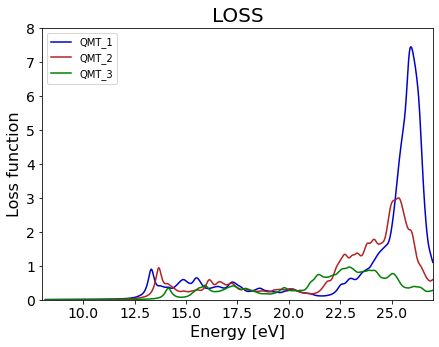

In [16]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

QMT_1 = np.genfromtxt(join(cwd_BSE_optical, 'LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT'))
QMT_2 = np.genfromtxt(join(cwd_BSE_optical, 'LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT002.OUT'))
QMT_3 = np.genfromtxt(join(cwd_BSE_optical, 'LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT003.OUT'))

plt.figure(figsize = (7, 5))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(QMT_1[:, 0], QMT_1[:, 1], color = "mediumblue")
plt.plot(QMT_2[:, 0], QMT_2[:, 1], color = "firebrick")
plt.plot(QMT_3[:, 0], QMT_3[:, 1], color = "green")
plt.title('LOSS', fontsize = 20)
plt.xlabel('Energy [eV]', fontsize = 16)
plt.ylabel('Loss function', fontsize = 16)
plt.xlim(8, 27)
plt.ylim(0, 8)
QMT_1_label = Line2D( [0 ], [0 ], label = 'QMT_1', color = 'mediumblue')
QMT_2_label = Line2D( [0 ], [0 ], label = 'QMT_2', color = 'firebrick')
QMT_3_label = Line2D( [0 ], [0 ], label = 'QMT_3', color = 'green')
plt.legend(handles = [QMT_1_label, QMT_2_label, QMT_3_label])

plt.show()

Notice that increasing the transferred momentum shifts the first peak to higher energies and reduces the oscillator strength. The pronounced maximum above 25 eV, which dominates the spectrum in the optical limit, is quenched at finite momentum transfer.

Again, as the main output files can be parsed by Python, in the example below, the results obtained for the dielectric function are saved in the dictionary **epsilon_optical_bse_results** and the results obtained for the loss function are saved in the dictionary **loss_optical_bse_results**.

In [17]:
epsilon_optical_bse_results: dict = parser_chooser(f'{cwd_BSE_optical}/EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

loss_optical_bse_results: dict = parser_chooser(f'{cwd_BSE_optical}/LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

We can further check that the obtained results are correct by comparing them with the reference calculations. To do so within the notebook, execute the following cell :

In [18]:
from assertions_q_dependent_bse import test_dielectric_optical_bse, test_loss_optical_bse

# Test results of dielectric function calculations
test_dielectric_optical_bse(epsilon_optical_bse_results, reference = 'reference_q_dependent_bse/BSE_optical/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

# Test results of loss function calculations
test_loss_optical_bse(loss_optical_bse_results, reference = 'reference_q_dependent_bse/BSE_optical/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. X-Ray BSE Calculation for Finite Momentum Values </span>

Equivalently to the calculation of the optical loss function above, we will now calculate the core loss function for excitations from the F *1s* states, *i.e.*, the F K edge of LiF. It is assumed that you are already familiar with this type of excited-state calculations, having performed the tutorial [<span style="color:firebrick">X-ray Absorption Spectra Using BSE</span>](http://exciting.wikidot.com/oxygen-x-ray-absorption-spectra-using-bse). We move back to the parent directory **LiF-BSE-q** directory and create a new sub-directory **NRIXS** then move there:

In [19]:
%%bash
# Create another working sub-directory
mkdir -p LiF-BSE-q/NRIXS

In [20]:
cwd_BSE_xray = join(getcwd(), 'LiF-BSE-q/NRIXS')

As usual, we need to copy files from the **GS** folder into the **NRIXS** one, to avoid repeating the ground-state calculation.

In [21]:
files = ['STATE.OUT', 'EFERMI.OUT']

# Copy files from groundstate directory to BSE directory
for file in files:
    source = join(cwd_GS, file)
    dest = join(cwd_BSE_xray, file)
    shutil.copyfile(source, dest)

Again we can use the same input file as in groundstate calculation but skip the ground-state calculation by setting <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> in the <code><span style="color:green">groundstate</span></code> element of the input file. Also, we add the <code><span style="color:green">xs</span></code> subelement into the input file. Now the file **input.xml** will look like the following.

```xml
<input>
 
   <title>LiF-BSE: X-Ray BSE Calculation</title>
 
   <structure speciespath="$EXCITINGROOT/species/">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="skip"
      ngridk="10  10  10"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>      
      
   <xs 
      xstype="BSE" 
      ngridk="4 4 4" 
      vkloff="0.097 0.273 0.493"
      ngridq="4 4 4"
      nempty="30"
      gqmax="3.0"
      broad="0.007"
      scissor="0.20947"
      tevout="true">
 
      <energywindow 
         intv="24.0 24.8" 
         points="1200"/>
 
      <screening 
         screentype="full"
         nempty="100"/>
 
      <BSE 
         bsetype="singlet"
         xas="true"
         xasspecies="2"
         xasatom="1"
         nstlxas="1 4"
         iqmtrange="1 3"/>
 
      <qpointset>
         <qpoint>0.00 0.0 0.00</qpoint>
         <qpoint>0.25 0.0 0.25</qpoint>
         <qpoint>0.50 0.0 0.50</qpoint>
      </qpointset>
 
   </xs>     
 
</input>

```

For manual execution, update the **input.xml** file on terminal. For running the calculation in the notebook, execute the following cells.

In [22]:
# Writing the input as an XML file
from excitingjupyter.utilities import re_input

notebook = join(os.getcwd(), 'q_dependent_bse_calculations.ipynb')
input_str = re_input(notebook, "LiF-BSE: X-Ray BSE Calculation")
with open(join(cwd_BSE_xray, 'input.xml'), "w") as fid:
    fid.write(input_str)

In [23]:
# Replacing the string "$EXCITINGROOT/species" in input.xml by the actual value of the environment variable
with open(join(cwd_BSE_xray, 'input.xml'), "r+") as fin:
    file_content = fin.read()
    file_content = file_content.replace('$EXCITINGROOT/species', f'{exciting_species}')
    fin.seek(0)
    fin.write(file_content)

The input file is nearly identical to the one used for optical calculations above. We have simply added the attribute <code><span style="color:mediumblue">xas</span></code> to trigger a core-level calculation, and we have specified which core states we want to excite using the attributes <code><span style="color:mediumblue">xasspecies</span></code>, <code><span style="color:mediumblue">xasatom</span></code>, and <code><span style="color:mediumblue">xasedge</span></code>. The range of unoccupied states is now defined by the attribute <code><span style="color:mediumblue">nstlxas</span></code>. Note that we also have to modify the attribute <code><span style="color:mediumblue">energywindow</span></code>, since core excitations occur at much higher energies than the optical ones.

Run the **BSE** calculation with the following commands:

In [24]:
from excitingtools.runner.runner import BinaryRunner

runner = BinaryRunner(f"{exciting_root}/bin/exciting_smp", "./", 4, 1500, "LiF-BSE-q/NRIXS")
run_results = runner.run()
print(vars(run_results))

{'stdout': b'\rCalculating RPA Dielectric Function:                 12.500\rCalculating RPA Dielectric Function:                 25.000\rCalculating RPA Dielectric Function:                 37.500\rCalculating RPA Dielectric Function:                 50.000\rCalculating RPA Dielectric Function:                 62.500\rCalculating RPA Dielectric Function:                 75.000\rCalculating RPA Dielectric Function:                 87.500\rCalculating RPA Dielectric Function:                100.000 \n\rCalculating Screened Coulomb Potential:              12.500\rCalculating Screened Coulomb Potential:              25.000\rCalculating Screened Coulomb Potential:              37.500\rCalculating Screened Coulomb Potential:              50.000\rCalculating Screened Coulomb Potential:              62.500\rCalculating Screened Coulomb Potential:              75.000\rCalculating Screened Coulomb Potential:              87.500\rCalculating Screened Coulomb Potential:             100.000 \n\rCal

Note that in this unusual case, the usual magic command of executing bash script in notebook, in order to run **exciting**, hangs.

After the run is successfully completed (it will take a few minutes), the usual output files and sub-folders will appear in the working directory.

Again, we are interested in the loss function, which is found inside the folder **LOSS**. The calculated loss function can be visualized from your command line with the same script used above:

<div style="background-color: rgb(224, 224, 224);">
    
```bash
cp LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT   LOSS/QMT_1
cp LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT002.OUT LOSS/QMT_2
cp LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT003.OUT LOSS/QMT_3
PLOT-files.py -d LOSS  -f QMT_1 QMT_2 QMT_3  -lx 'Energy [eV]'  -ly 'Loss function'  -x 655 675
```
</div>

These commands create the file **PLOT.png**:

<div>
<img src="images_q_dependent_bse_calculations/graph_2.jpg" width="500" align="left"/>
</div>

The plot can also be produced within this notebook by executing the following cell.

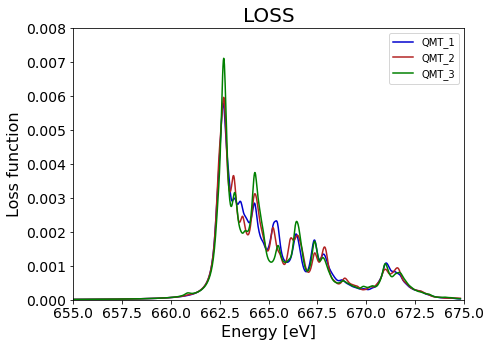

In [26]:
QMT_1 = np.genfromtxt(join(cwd_BSE_xray, 'LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT'))
QMT_2 = np.genfromtxt(join(cwd_BSE_xray, 'LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT002.OUT'))
QMT_3 = np.genfromtxt(join(cwd_BSE_xray, 'LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_QMT003.OUT'))

plt.figure(figsize = (7, 5))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(QMT_1[:, 0], QMT_1[:, 1], color = "mediumblue")
plt.plot(QMT_2[:, 0], QMT_2[:, 1], color = "firebrick")
plt.plot(QMT_3[:, 0], QMT_3[:, 1], color = "green")
plt.title('LOSS', fontsize = 20)
plt.xlabel('Energy [eV]', fontsize = 16)
plt.ylabel('Loss function', fontsize = 16)
plt.xlim(655, 675)
plt.ylim(0.000, 0.008)
QMT_1_label = Line2D( [0 ], [0 ], label = 'QMT_1', color = 'mediumblue')
QMT_2_label = Line2D( [0 ], [0 ], label = 'QMT_2', color = 'firebrick')
QMT_3_label = Line2D( [0 ], [0 ], label = 'QMT_3', color = 'green')
plt.legend(handles = [QMT_1_label, QMT_2_label, QMT_3_label], loc = 'upper right')

plt.show()

We observe less dependence of the loss function on momentum transfer than we saw in the previous case for the optical region. The most relevant changes in the spectrum with increasing momentum transfer are the emergence of a pre-peak that is dark at **q** = 0 and the increasing intensity of the first strong peak.

Again, as the main output files can be parsed by Python, in the example below, the results obtained for the dielectric function are saved in the dictionary **epsilon_xray_bse_results** and the results obtained for the loss function are saved in the dictionary **loss_xray_bse_results**.

In [27]:
epsilon_xray_bse_results: dict = parser_chooser(f'{cwd_BSE_xray}/EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

loss_xray_bse_results: dict = parser_chooser(f'{cwd_BSE_xray}/LOSS/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

We can further check that the obtained results are correct by comparing them with the reference calculations. To do so within the notebook, execute the following cell :

In [28]:
from assertions_q_dependent_bse import test_dielectric_xray_bse, test_loss_xray_bse

# Test results of dielectric function calculations
test_dielectric_xray_bse(epsilon_xray_bse_results, reference = 'reference_q_dependent_bse/BSE_xray/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

# Test results of loss function calculations
test_loss_xray_bse(loss_xray_bse_results, reference = 'reference_q_dependent_bse/BSE_xray/LOSS_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT')

<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. Exercise</span>

- Modify the attribute <code><span style="color:mediumblue">bsetype</span></code> to calculate the independent-particle (**IP**), random-phase approximation **RPA** and **triplet** loss function spectrum in the optical range for LiF. How is the spectrum modified? If you have already computed the **singlet** spectra, you only need to execute the last task of the **BSE** program flow, *i.e.*, **"bse"**, when switching the <code><span style="color:mediumblue">bsetype</span></code>.